## Analises do dataset airbnb

Participantes: Danúbia Carvalho Gomes Cantanhede; Victor Hugo Ciurlino

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/dados_tratados.csv")

In [28]:
def tabela_review(df):
    df_review = df[['listing_url',
    'neighbourhood_cleansed',
    'number_of_reviews',
    'accommodates',
    'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month', 'price']]
    df_review = df_review[df_review['number_of_reviews'] > 10]
    return df_review

In [29]:
def tabela_acomodacao(df):
    df_acomodacao = df[['id',
    'neighbourhood_cleansed',
    'distancia_parada_metros',
    'property_type',
    'room_type',
    'accommodates',
    'bathrooms_text',
    'bedrooms',
    'beds',
    'amenities',
    'price',
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value']]
    df_acomodacao = df_acomodacao[df_acomodacao['number_of_reviews'] > 10]
    return df_acomodacao

In [30]:
df_acomodacao = tabela_acomodacao(df)
df_review = tabela_review(df)

In [88]:
def analise_dados(df_revisao, df_imovel):

    groupby_review_sum = df_revisao.groupby("neighbourhood_cleansed", as_index=False)['number_of_reviews'].sum()
    groupby_review_mean = df_revisao.groupby("neighbourhood_cleansed", as_index=False)['review_scores_value'].mean()
    df_groupby_neighbourhood = df_imovel.groupby("neighbourhood_cleansed", as_index=False)["price"].mean()
    df_novo = pd.merge(groupby_review_sum,groupby_review_mean,on='neighbourhood_cleansed',how='left')
    df_novo = pd.merge(df_novo,df_groupby_neighbourhood,on='neighbourhood_cleansed',how='left')
    df_novo['métrica_avaliacao'] = df_novo['number_of_reviews']*df_novo['review_scores_value']/(5*df_novo['price'])
    fig = px.histogram(df_novo[(df_novo['review_scores_value'] >4.83) & (df_novo['number_of_reviews'] >100)],
                x="neighbourhood_cleansed",
                y="number_of_reviews",
                color='review_scores_value', 
                barmode='group',
                height=500, labels={
                        "neighbourhood_cleansed": "Bairro",
                        "number_of_reviews": "Total de avaliações",
                        "review_scores_value": "Média de avaliação"
                    },
                    title="Gráfico de total de avaliações por bairro")
    fig.update_xaxes(categoryorder='total descending')
    fig.show()
    fig = px.histogram(df_novo[(df_novo['review_scores_value'] >4.83) & (df_novo['number_of_reviews'] >100)], 
            x="neighbourhood_cleansed", 
            y="price",
            color='review_scores_value', 
            barmode='group',
            height=500, labels={
                     "neighbourhood_cleansed": "Bairro",
                     "price": "Preço da diária",
                     "review_scores_value": "média da avaliação"
                 },
                title="Gráfico de diária por bairro")
    fig.update_xaxes(categoryorder='total ascending')
    fig.show()
    fig = px.histogram(df_novo[(df_novo['review_scores_value'] >4.83) & (df_novo['number_of_reviews'] >100)], 
            x="neighbourhood_cleansed", 
            y="métrica_avaliacao",
            color='price', 
            barmode='group',
            height=500, labels={
                     "neighbourhood_cleansed": "Bairro",
                     "métrica_avaliacao": "Métrica de avaliação",
                     "price": "Preço da diária"
                 },
                title="Gráfico de diária por bairro")
    fig.update_xaxes(categoryorder='total descending')
    fig.show()
    

## Análise Cenário geral

In [89]:
analise_dados(df_review, df_acomodacao)

Sobre o Custo benefício em um cenário geral, usamos os dois gráficos de barra acima para buscar a região com maior nota de avaliação e com um maior número de avaliadores, reforçando assim o peso da nota final. Uma nota 5 dada por um único avaliador deve ser ignorada, pois o peso de um único avaliador para um imóvel não é maior do que uma nota 5 com mais de 100 avaliadores. No segundo gráfico buscamos aquele que possúi o menor preço dentre aqueles de maior avaliação e maior número de avaliação.

Dito isso, há 2 opções a serem consideradas na análise:
- Tijuca, com 2039 avaliadores de nota 4.84 e com a diária de 264,14 reais em média;
- Portuguesa, com 658 avaliadores de nota 4.85 e com diária de 152,08 reais em média

Dada essas informações, foi criada uma métrica levando em conta o que cada uma das variáveis significam.
A métrica em questão possui a seguinte fórmula:

  $$métrica = \frac{totais\_de\_avaliacoes * nota\_avaliacoes}{5* preco\_diaria}$$


<AxesSubplot:>

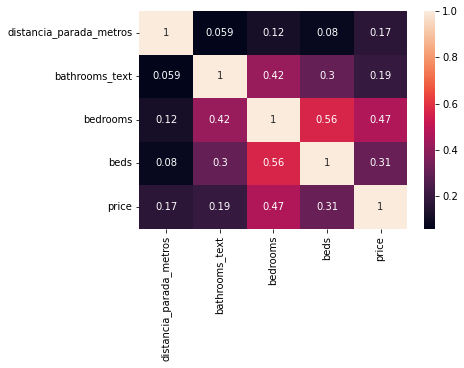

In [90]:
df_cov=df[['distancia_parada_metros',
            'bathrooms_text',
            'bedrooms',
            'beds',
            'price']]
sns.heatmap(df_cov.corr(), annot=True)

Na matriz de confusão acima, podemos ver uma grande influência no número de quartos e camas no preço da diária. Dito isso, é necessário uma análise um pouco mais específica para cada grupo de viajante, seja sozinho ou em família. Dessa forma, é possível identificar o melhor custo benefício para cada cenário

## Análise para viajantes sozinhos

In [91]:
df_review_um = df_review[df_review['accommodates'] == 1]
df_acomodacao_um = df_acomodacao[df_acomodacao['accommodates'] == 1]
analise_dados(df_review_um, df_acomodacao_um)

Para pessoas que irão viajar sozinhas, podemos ver que já temos uma diferença em relação ao cenário geral, sendo mais indicado o bairro Laranjeiras, possuindo as melhores opções para lugares onde acomodam 1 pessoa.

## Análise para casal de viajantes

In [92]:
df_casal = df_review[df_review['accommodates'] == 2]
df_acomodacao_casal = df_acomodacao[df_acomodacao['accommodates'] == 2]
analise_dados(df_casal, df_acomodacao_casal)

Para casais, vemos que Tijuca volta a se destacar, tendo um valor de métrica de custo benefício bem acima dos demais.

## Análise para familia de 3 viajantes

In [93]:
df_familia_pequena = df_review[df_review['accommodates'] == 3]
df_acomodacao_tres = df_acomodacao[df_acomodacao['accommodates'] == 3]
analise_dados(df_familia_pequena, df_acomodacao_tres)

## Análise para Família média/grande

In [94]:
df_familia = df_review[(df_review['accommodates'] == 4) | (df_review['accommodates'] == 5)]
df_acomodacao_familia = df_acomodacao[(df_acomodacao['accommodates'] == 4) | (df_acomodacao['accommodates'] == 5)]
analise_dados(df_familia, df_acomodacao_familia)

## Conclusão

Com base nas análises, fica evidente que Tijuca em sua maioria é o lugar mais atraente em termos de custo e benefício, exceto no cenário onde se está viajando sozinho. Nesse cenário em particular, o bairro tijuca não dispõe de opções atraentes para aqueles que viajam, sendo mais vantajoso o bairro laranjeiras. 